# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline

Let's generate our dataset and take a look on it.

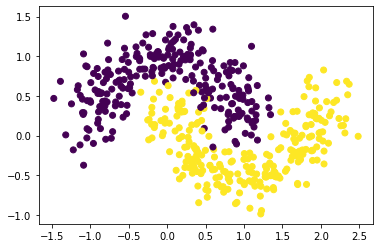

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [4]:
from sklearn.metrics import f1_score

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(solver = 'saga', tol = 1e-3, max_iter = 500) # add some params
svm = SVC(kernel='linear') # here too

### YOUR CODE HERE

lr.fit(moons_points, moons_labels)
svm.fit(moons_points, moons_labels)

SVC(kernel='linear')

<AxesSubplot:>

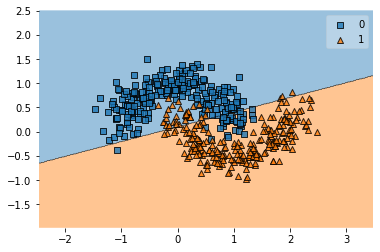

In [6]:
plot_decision_regions(moons_points, moons_labels, clf = lr)

<AxesSubplot:>

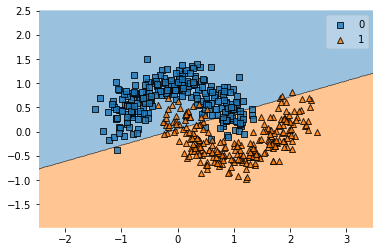

In [7]:
plot_decision_regions(moons_points, moons_labels, clf = svm)

In [16]:
def get_scores(model, features, labels):
    pred = model.predict(features)
    f1 = f1_score(pred, labels, average = 'macro')
    return f1

In [17]:
f1_lr = get_scores(lr, moons_points, moons_labels)
f1_svm = get_scores(svm, moons_points, moons_labels)
f1_lr, f1_svm

(0.8559976959631355, 0.857985798579858)

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

- Quality are inrease
- Polynomial of 3 degree has line with one bending. RBF has surface like distorted half-moon.  Sigmoid has surface like rocks with two bends
- I chosen 3 degree, because i thought, that poly with 3 degree must be enough  in order to describe two bendings.

In [10]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

In [22]:
def test_models(labels, models):
    column_size = 2
    line_size = len(labels) // column_size + 1
    
    gs = gridspec.GridSpec(line_size, column_size)

    fig = plt.figure(figsize=(10,8))
    
    for label, clf, grd in zip(labels, models, itertools.product(range(line_size), repeat=column_size)):
        
        ax = plt.subplot(gs[grd[0], grd[1]])
        fig = plot_decision_regions(X = moons_points, y = moons_labels, clf = clf, legend=2)
        plt.title(label)

    plt.show()

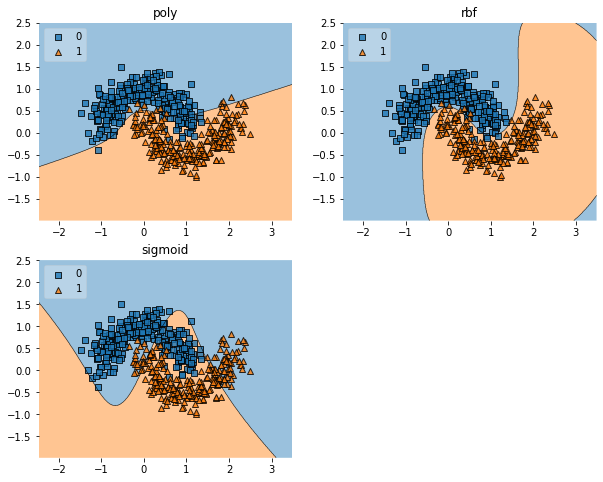

In [28]:
### YOUR CODE HERE

kernels = ['poly', 'rbf', 'sigmoid']
models = []
labels = []
scores = dict.fromkeys(kernels)

for kernel in kernels:
    model = SVC(kernel = kernel, degree = 3)
    model.fit(moons_points, moons_labels)
    models.append(model)
    
    scores[kernel] = get_scores(model, moons_points, moons_labels)
    
    labels.append(kernel)

test_models(labels, models)

In [29]:
scores

{'poly': 0.9057644110275689, 'rbf': 0.9739990639663028, 'sigmoid': 0.648}

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

-  LR with polynomial features have good result and decrease gap between f1 scores. But still polynomial features is not helped to LR in order to surpassed SVM with RBF kernel. And surface has two bending also, but distorted in the best way.
- I used second degree of polynomials features like in SVM kernel

0.963855421686747

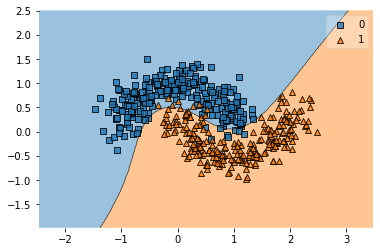

In [134]:
from sklearn.preprocessing import PolynomialFeatures

### YOUR CODE HERE

model = LogisticRegression(solver = 'saga', tol = 1e-3, max_iter = 500)
pf = PolynomialFeatures(3)
plr = make_pipeline(pf, model)

plr.fit(moons_points, moons_labels)

plot_decision_regions(moons_points, moons_labels, clf = plr)
f1_poly = get_scores(plr, moons_points, moons_labels)
f1_poly

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

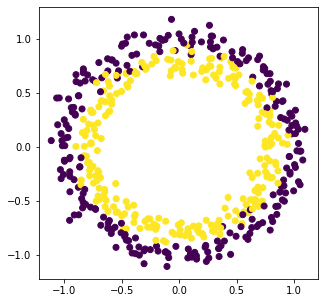

In [142]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

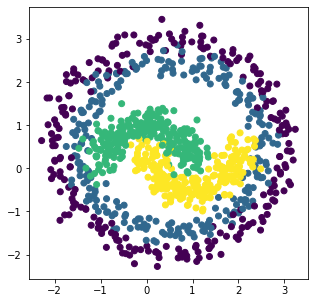

In [83]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

0.9314516129032259

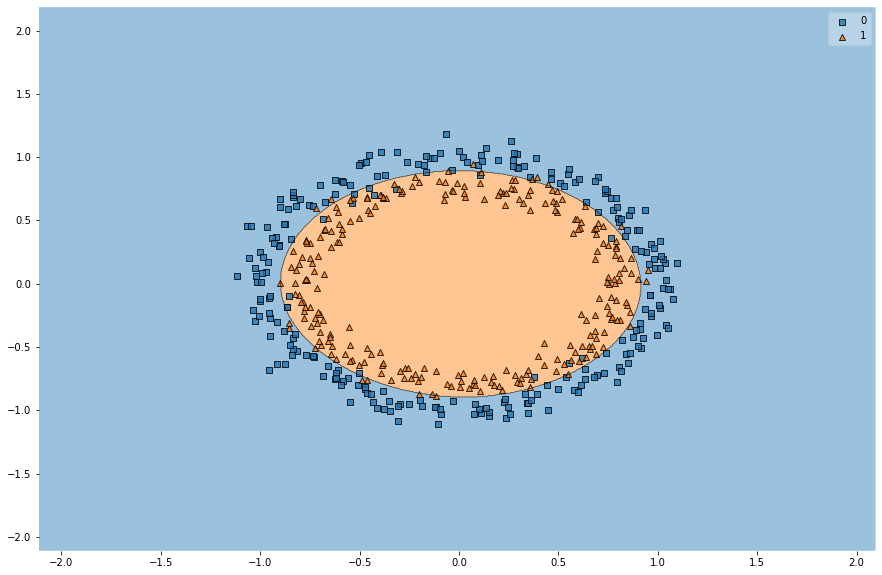

In [143]:
### YOUR CODE HERE
svm = SVC(kernel='rbf') # here too
svm.fit(circles_points, circles_labels)

plt.figure(figsize=(15, 10))
plot_decision_regions(circles_points, circles_labels, clf = svm)
f1 = get_scores(svm, circles_points, circles_labels)
f1

C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


0.9209856718251709

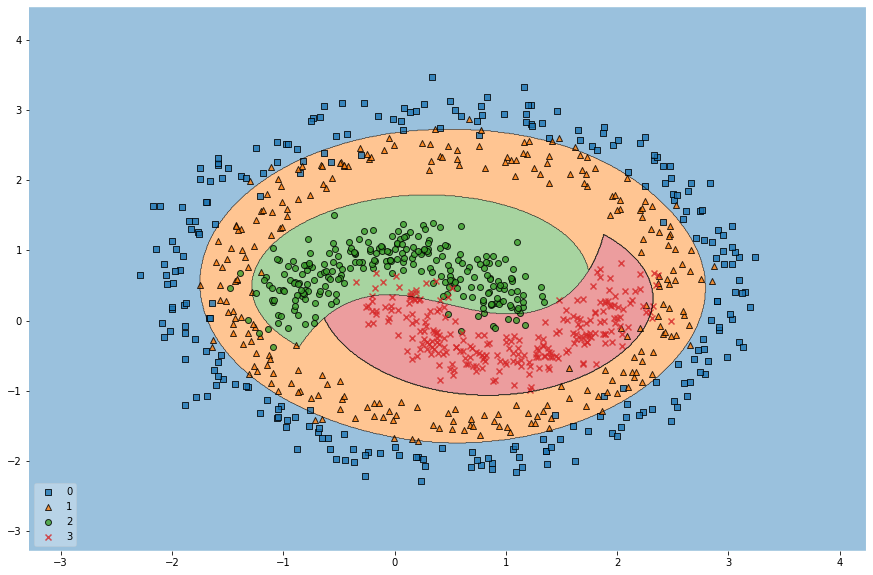

In [150]:
### YOUR CODE HERE
svm = SVC(kernel='rbf') # here too
svm.fit(points, labels)

plt.figure(figsize=(15, 10))
plot_decision_regions(points, labels, clf = svm, legend = 3)
f1 = get_scores(svm, points, labels)
f1

0.9419941994199419

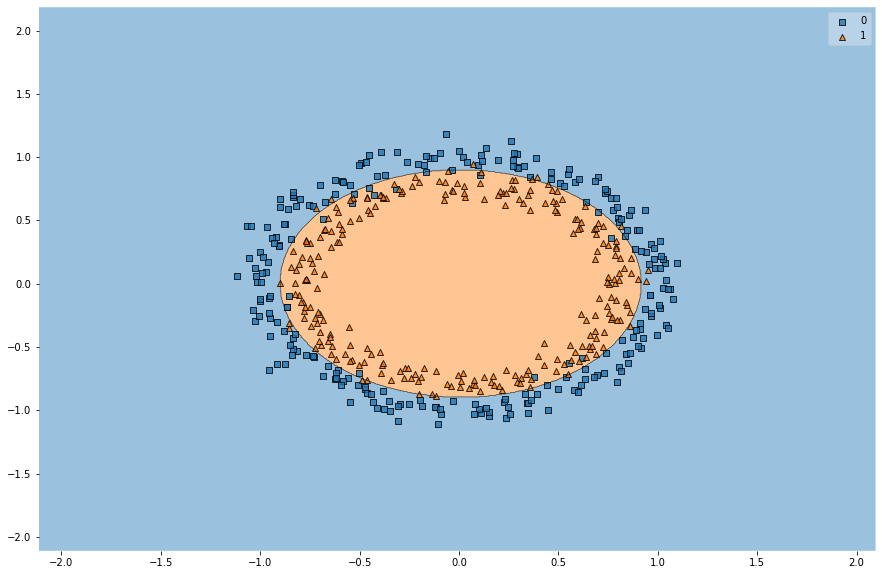

In [151]:
model = LogisticRegression(solver = 'saga', tol = 1e-3, max_iter = 500)
pf = PolynomialFeatures(2)
plr = make_pipeline(pf, model)

plr.fit(circles_points, circles_labels)
plt.figure(figsize=(15, 10))
plot_decision_regions(circles_points, circles_labels, clf = plr)

f1_poly = get_scores(plr, circles_points, circles_labels)
f1_poly

C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


0.8958849206349206

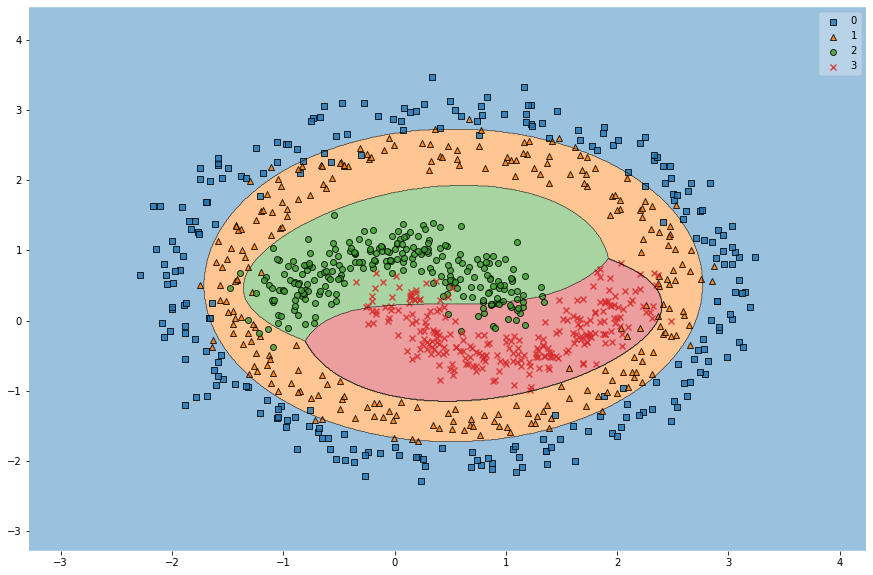

In [158]:
model = LogisticRegression(solver = 'saga', tol = 1e-3, max_iter = 500)
pf = PolynomialFeatures(3)
plr = make_pipeline(pf, model)

plr.fit(points, labels)
plt.figure(figsize=(15, 10))
plot_decision_regions(points, labels, clf = plr)

f1_poly = get_scores(plr, points, labels)
f1_poly